# Data analysis to understand the behavior of the prices and stock in Mango.

Author: Andrés Felipe González Rojas

For this project, will answer questions for the understanding of the brand strategy, for this it is going to be focusin on 4 types of questions that are "price distribution", "SKU analysis", "correlation analysis" and "product analysis". This notebook contains code for solving the interrogations using mainly pandas for data management and matplolib as a visual aid of the descriptive statistics.

## Imported liberies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data reading and structure visualization

In [2]:
df_mango = pd.read_csv("/Users/andresgonzalez/jupyter_pandas_numpy/Proyecto_Mango/store_mango.csv", sep=",", header=0)
df_mango.head(2)

# Import here the DataFrame I´m going to use for the analysis, and checking algo with head the diferent categories in the DataFrfame.

,brand,url,sku,name,description,price,currency,category,images,scraped_at,terms,section,image_downloads
0,Mango,https://shop.mango.com/fi/women/jackets-and-su...,67050682,chaqueta lana cinturón,"wool mix fabric, straight design, crossover de...",69.99,EUR,chaquetas y americanas,['https://st.mngbcn.com/rcs/pics/static/T6/fot...,2024-02-21T12:51:19.171380,jackets,H,"['db68f55d-92f1-43e5-b038-f1708dd75daf', '0c1c..."
1,Mango,https://shop.mango.com/fi/women/jackets-and-su...,67044062,chaqueta punto botones,"cotton-blend fabric, medium knit, straight des...",49.99,EUR,chaquetas y americanas,['https://st.mngbcn.com/rcs/pics/static/T6/fot...,2024-02-21T12:51:30.009099,jackets,H,"['3f64f51b-d437-4ae8-89f5-7da1adcb4f4e', 'aee6..."


## Support methods for ploting

In [3]:
total_mango_min = df_mango["price"].min()
total_mango_max = df_mango["price"].max()
total_mango_range = df_mango["price"].max() - df_mango["price"].min()
total_mango_average = df_mango["price"].mean()
# Operations from the total price of the brand (average,min,max,range)

## Support methods for ploting category using price

1. What is the distribution of product prices across different categories?

In [5]:
df_mango_category = df_mango["category"].unique()
minprices = []
maxprices = []
averageprices = []
rangeprices = []
for df_category in df_mango_category:
    data_category = df_mango[df_mango["category"]==df_category]
    minprice = data_category["price"].min()
    maxprice = data_category["price"].max()
    averageprice = data_category["price"].mean()
    rangeprice = maxprice - minprice
    minprices.append(minprice)
    maxprices.append(maxprice)
    averageprices.append(averageprice)
    rangeprices.append(rangeprice)

# Here I use the .unique() in order to create a variable with the unique values of the DataFrame
# For the next step create empty list in orden to introduce future values there.
# Then I´m iterating the values in each category and making operatins to know the average,min,max,range in terms of price for each category
# And fot the last part introducing each value in the empty lists.


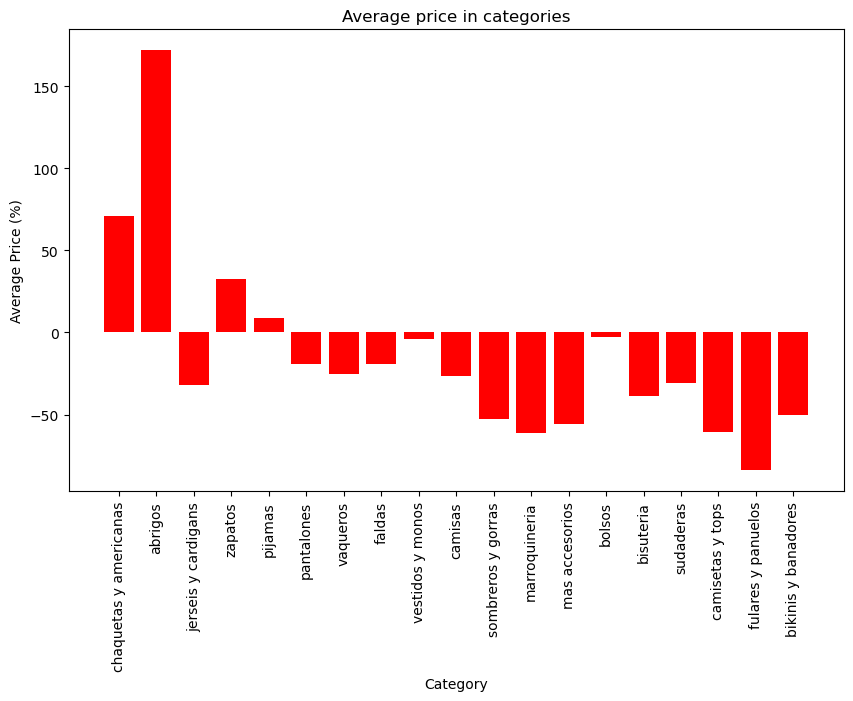

In [6]:
categoryxprice = df_mango_category.tolist()
plt.figure(figsize=(10,6))
plt.bar(categoryxprice,((averageprices/ total_mango_average)*100) - 100,color="red")
plt.xlabel("Category")
plt.ylabel("Average Price (%)")
plt.title("Average price in categories")
plt.xticks(rotation=90)
plt.show()

# For the first step I´m converting df_mango_category that is a python list to a pandas series that is categoryxprice
# Then creating the figure to make the chart with the information, selecting the metod I want to use to make the chart, and introducing the xlabel that is categoryxprice, in order to have all the categories in x-axis and then making a formula to have a percentage for the average price of each category, the value 0 in y-axis is the average price of all the items of the brand.

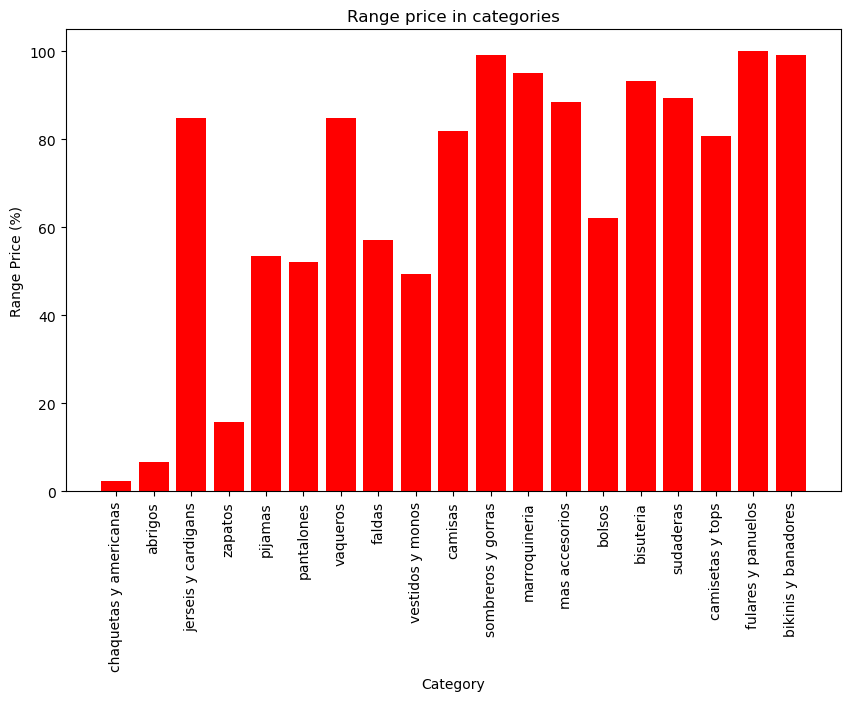

In [7]:
categoryxprice = df_mango_category.tolist()

rangeprices_float = [float(rp)for rp in rangeprices]
percentage_range = [(rp / total_mango_range) * 100 for rp in rangeprices_float]
range_percentage = [pr - 100 for pr in percentage_range]
positive_range_percentage = [-1 * pr for pr in range_percentage]

plt.figure(figsize=(10,6))
plt.bar(categoryxprice,positive_range_percentage,color="red")
plt.xlabel("Category")
plt.ylabel("Range Price (%)")
plt.title("Range price in categories")
plt.xticks(rotation=90)
plt.show()

# For the first step I´m converting df_mango_category that is a python list to a pandas series that is categoryxprice
# Then i have to convert the values of rangeprices to float and operate creating diferent lists, so that in the end I can use only one variable on the y-axis.

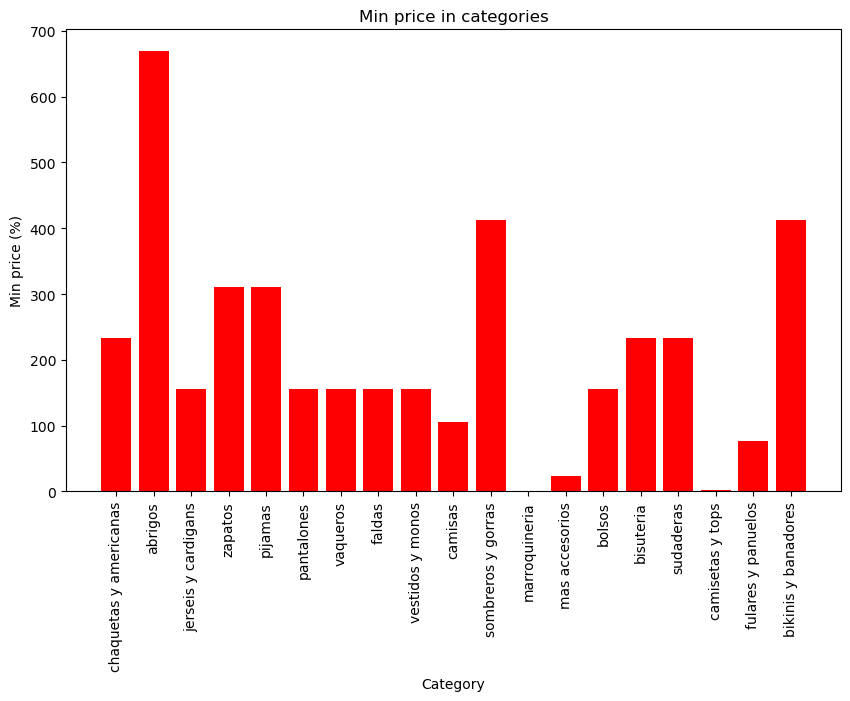

In [8]:
categoryxprice = df_mango_category.tolist()

minprices_float = [float(minp)for minp in minprices]
percentage_min = [(minp / total_mango_min) * 100 for minp in minprices_float]
min_percentage = [pmin - 100 for pmin in percentage_min]

plt.figure(figsize=(10,6))
plt.bar(categoryxprice,min_percentage,color="red")
plt.xlabel("Category")
plt.ylabel("Min price (%)")
plt.title("Min price in categories")
plt.xticks(rotation=90)
plt.show()

# For the first step I´m converting df_mango_category that is a python list to a pandas series that is categoryxprice
# Then i have to convert the values of rangeprices to float and operate creating diferent lists, so that in the end I can use only one variable on the y-axis.

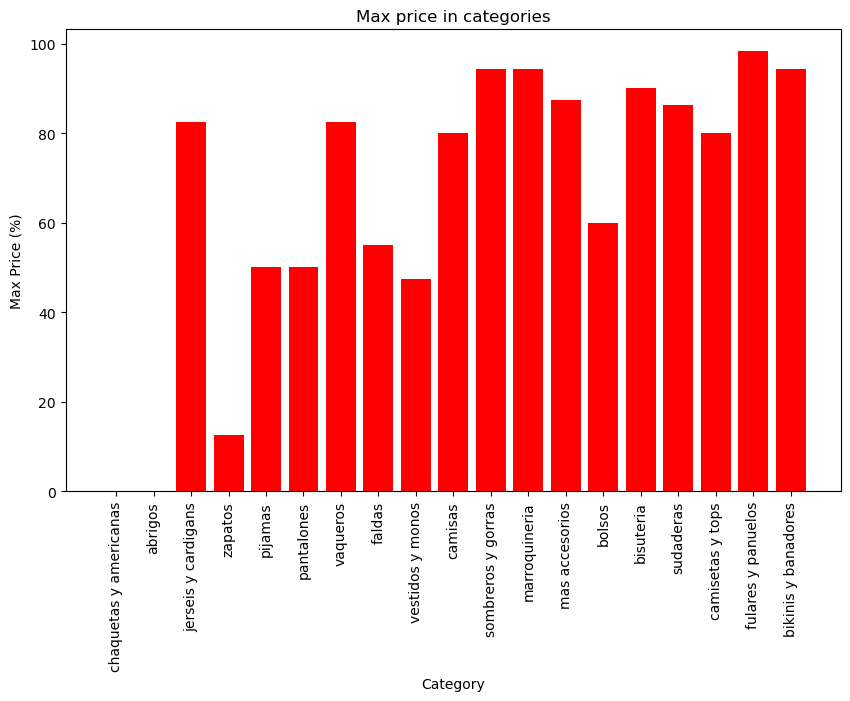

In [9]:
categoryxprice = df_mango_category.tolist()

maxprices_float = [float(maxp)for maxp in maxprices]
percentage_max = [(maxp / total_mango_max) * 100 for maxp in maxprices_float]
max_percentage = [pmax - 100 for pmax in percentage_max]
positive_max_percentage = [-1 * pmax for pmax in max_percentage]

plt.figure(figsize=(10,6))
plt.bar(categoryxprice,positive_max_percentage,color="red")
plt.xlabel("Category")
plt.ylabel("Max Price (%)")
plt.title("Max price in categories")
plt.xticks(rotation=90)
plt.show()

# For the first step I´m converting df_mango_category that is a python list to a pandas series that is categoryxprice
# Then i have to convert the values of rangeprices to float and operate creating diferent lists, so that in the end I can use only one variable on the y-axis.

## Support methods for ploting category using SKU

2. Are there any patterns or trends in how SKUs are assigned to different categories or price ranges?

In [57]:
col_sku = df_mango["sku"]
df_mango["len_sku"] = col_sku.apply(lambda x: len(str(x)))
df_mango.head(2)
# Creating a new column in order to know if each sku number has the same lenght.

,brand,url,sku,name,description,price,currency,category,images,scraped_at,terms,section,image_downloads,number_images,len_sku
0,Mango,https://shop.mango.com/fi/women/jackets-and-su...,67050682,chaqueta lana cinturón,"wool mix fabric, straight design, crossover de...",69.99,EUR,chaquetas y americanas,['https://st.mngbcn.com/rcs/pics/static/T6/fot...,2024-02-21T12:51:19.171380,jackets,H,"['db68f55d-92f1-43e5-b038-f1708dd75daf', '0c1c...",368,8
1,Mango,https://shop.mango.com/fi/women/jackets-and-su...,67044062,chaqueta punto botones,"cotton-blend fabric, medium knit, straight des...",49.99,EUR,chaquetas y americanas,['https://st.mngbcn.com/rcs/pics/static/T6/fot...,2024-02-21T12:51:30.009099,jackets,H,"['3f64f51b-d437-4ae8-89f5-7da1adcb4f4e', 'aee6...",368,8


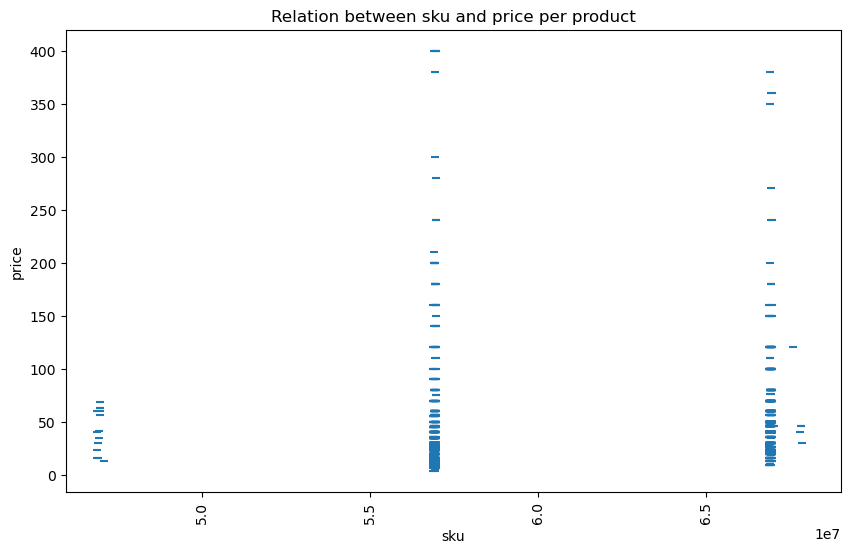

In [58]:
col_sku = df_mango["sku"].tolist()
col_price = df_mango["price"].tolist()
plt.figure(figsize=(10,6))
plt.scatter(col_sku,col_price, marker=0)
plt.xlabel("sku")
plt.ylabel("price")
plt.title("Relation between sku and price per product")
plt.xticks(rotation=90)
plt.show()

# converting the two columns sku and price into lists in order to include them in a graph, taking the values of each one, using a scatter plot to understand how does it afect the number of sku into the price of the products

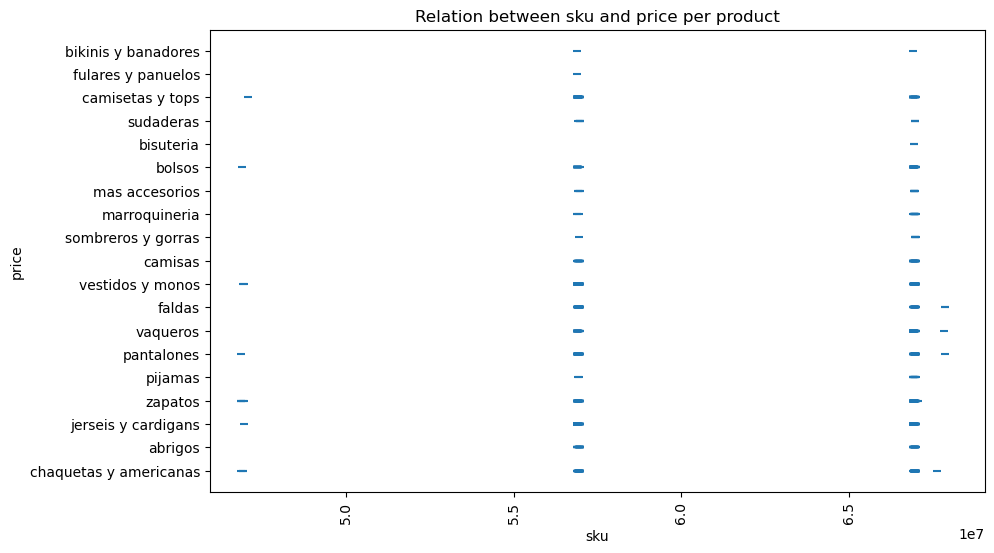

In [64]:
col_sku = df_mango["sku"].tolist()
col_category = df_mango["category"].tolist()
plt.figure(figsize=(10,6))
plt.scatter(col_sku,col_category, marker=0)
plt.xlabel("sku")
plt.ylabel("price")
plt.title("Relation between sku and price per product")
plt.xticks(rotation=90)
plt.show()

## Data reading and structure visualization

3. Is there a correlation between product price and the number of images a product has?

In [15]:
df_mango["number_images"] = df_mango["images"].apply(lambda x: len(x))
df_mango.head(2)
# Here was introduced a new column that incluides the number of images in each product, using images that has a list of urls with the images of the product and creating a new column counting the number of items in each list, and converting into a int.

,brand,url,sku,name,description,price,currency,category,images,scraped_at,terms,section,image_downloads,number_images
0,Mango,https://shop.mango.com/fi/women/jackets-and-su...,67050682,chaqueta lana cinturón,"wool mix fabric, straight design, crossover de...",69.99,EUR,chaquetas y americanas,['https://st.mngbcn.com/rcs/pics/static/T6/fot...,2024-02-21T12:51:19.171380,jackets,H,"['db68f55d-92f1-43e5-b038-f1708dd75daf', '0c1c...",368
1,Mango,https://shop.mango.com/fi/women/jackets-and-su...,67044062,chaqueta punto botones,"cotton-blend fabric, medium knit, straight des...",49.99,EUR,chaquetas y americanas,['https://st.mngbcn.com/rcs/pics/static/T6/fot...,2024-02-21T12:51:30.009099,jackets,H,"['3f64f51b-d437-4ae8-89f5-7da1adcb4f4e', 'aee6...",368


## Support methods for ploting number of images using price

In [16]:
df_mango_category_images = df_mango["number_images"].unique()
minimagesprices = []
maximagesprices = []
averageimagesprices = []
rangeimagesprices = []
for df_category_image in df_mango_category_images:
    data_category_image = df_mango[df_mango["number_images"]==df_category_image]
    minimageprice = data_category_image["price"].min()
    maximageprice = data_category_image["price"].max()
    averageimageprice = data_category_image["price"].mean()
    rangeimageprice = maximageprice - minimageprice
    minimagesprices.append(minimageprice)
    maximagesprices.append(maximageprice)
    averageimagesprices.append(averageimageprice)
    rangeimagesprices.append(rangeimageprice)

# Here I use the .unique() in order to create a variable with the unique values of the DataFrame
# For the next step create empty list in orden to introduce future values there.
# Then I´m iterating the values in each number_images from the index and making operatins to know the average,min,max,range in terms of price for each number_images
# And fot the last part introducing each value in the empty lists.

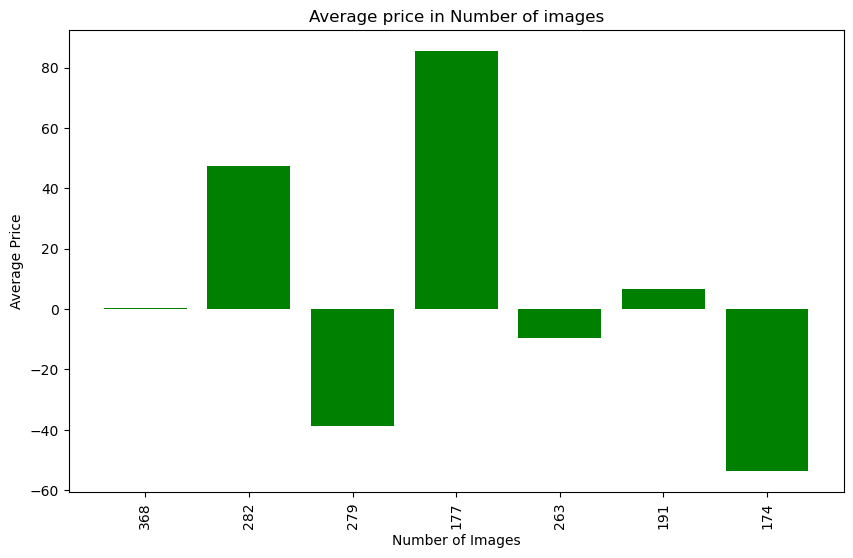

In [17]:
categoryximagexprice = df_mango_category_images.tolist()
labels = [str(x) for x in categoryximagexprice]
plt.figure(figsize=(10,6))
plt.bar(labels,((averageimagesprices/ total_mango_average)*100) - 100,color="green")
plt.xlabel("Number of Images")
plt.ylabel("Average Price")
plt.title("Average price in Number of images")
plt.xticks(rotation=90)
plt.show()

# For the first step I´m converting df_mango_category that is a python list to a pandas series that is categoryximagexprice
# As number_images are int i have to convert to str, so i change using for to introduce the values of categoryximagesxprice to the variable labels and then use this in the x-axis and the operations of average in the y-axis

## Data reading and structure visualization

4. How many products are for woman? How many for men?

In [20]:
word_filter = "women"
df_filter_women = df_mango[df_mango["url"].str.contains(word_filter)]
df_filter_women.value_counts()

# Use the .contains to search a word in the DataFrame, in the column url, to search if it is clothes for women

brand  url                                                                                                          sku       name                         description                                                                                                                                                                                                                     price  currency  category                images                                                                                                                                                                                                                                                                                                                                                                            scraped_at                  terms    section  image_downloads                                                                                                                                                   nu

In [21]:
word_filter = "/men"
df_filter_men = df_mango[df_mango["url"].str.contains(word_filter)]
df_filter_men.value_counts()

# # Use the .contains to search a word in the DataFrame, in the column url, to search if it is clothes for men, here i have to use as the word to filter /men, because if i only use men it would include women.

Series([], Name: count, dtype: int64)